# LAB7: Programowanie sieciowe – algorytmy CPM, PERT

# Zadanie 1
Realizacja algorytmu PERT:

In [21]:
inf = float('inf')
graph = {
    1 : [2,3],
    2: [4,5],
    3: [4],
    4: [5],
    5: [],
}
prevs = {
    1 : [],
    2: [1],
    3: [1],
    4: [2,3],
    5: [2,4],
}

a = [
    [inf, 13, 12, inf, inf],
    [inf, inf, inf, 2, 15],
    [inf, inf, inf, 8, inf],
    [inf, inf, inf, inf, 2],
    [inf, inf, inf, inf, inf],
    
]

def PERT(graph, s, l):
    """Algorytm PERT do wyznaczania ścieżki krytycznej, terminu realizacji oraz 
    """
    Pw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    
    #forward Pw 
    for u in graph:
        if u != s:
            Pw[u] = max([Pw[v]+ a[v-1][u-1] for v in prevs[u]])
        else:
            Pw[u] = 0

    #backward Kp
    Kp[l] = Pw[l]
    for u in list(graph.keys())[::-1]:
        for v in prevs[u]:
            Kp[v] = min(Kp[v], Kp[u] - a[v-1][u-1])

    EST = {}
    EFT = {}
    LST = {}
    LFT = {}
    duration = {}
    visited = []
    Q = [s]
    while Q:
        v = Q.pop(0)
        if v not in visited:
            visited.append(v)
            for u in graph[v]:
                duration[(v,u)] = a[v-1][u-1]
                EST[(v,u)] = Pw[v]
                LFT[(v,u)] = Kp[u]
                EFT[(v,u)] = EST[(v,u)] + duration[(v,u)] 
                LST[(v,u)] = LFT[(v,u)] - duration[(v,u)] 
                Zc[(v,u)] = LFT[(v,u)] - EFT[(v,u)]
                Q.append(u)
    
    #reconstruct critical paths
    Zc_c = Zc.copy()
    copied = Zc.copy()
    crit_path = []
    visited = []
    next = 1
    while copied:
        path = []
        Zc_c = copied.copy()
        for task in Zc_c:
            if Zc_c[task] == 0:
                if next not in visited and next == task[0]:   
                    path.append(task[0])
                    next = task[1]
                    copied.pop(task)
            else:
                copied.pop(task)
        path.append(next)
        if crit_path and path[0] == crit_path[0][-1]:
            crit_path[0].extend(path[1:])
            break
        elif crit_path:
            path.append(*crit_path[0][crit_path[0].index(next)+1:])
        crit_path.append(path)
        if copied:  
            next = list(copied.keys())[0][0]
      
    
    
    return crit_path, Kp[l], EST, LFT, EFT, LST, Zc, duration

crit_path, date, Pw, Kp, Kw, Pp, Zc, duration = PERT(graph, 1, 5)
print(crit_path)

[[1, 2, 5]]


### Przykład przedsięwzięcia na grafie 12 wierzchołków, 20 krawędzi
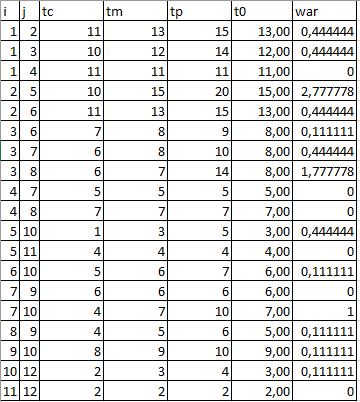

In [24]:
inf = float('inf')
graph = {
    1 : [2,3,4],
    2: [5,6],
    3: [6,7,8],
    4: [7,8],
    5: [10,11],
    6: [10],
    7: [9,10],
    8: [9],
    9: [10],
    10: [12],
    11: [12],
    12: []
}

a = [
    [inf, 13, 12, 11, inf,inf,inf,inf,inf,inf,inf,inf],
    [inf, inf, inf, inf, 15, 13,inf,inf,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,8,8,8,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,5,7,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,3,4,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,6,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,6,7,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,5, inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,9,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,3],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,2],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,inf],

    
]
prevs = {
    1 : [],
    2: [1],
    3: [1],
    4: [1],
    5: [2],
    6: [2,3],
    7: [3,4],
    8: [3,4],
    9: [7,8],
    10: [5,6,7,9],
    11: [5],
    12: [10,11]
}

crit_path, date, Pw, Kp, Kw, Pp, Zc, duration = PERT(graph, 1, 12)
print(f'Ścieżka krytyczna to: {crit_path} a termin realizacji to: {date} dni')

Ścieżka krytyczna to: [[1, 3, 7, 9, 10, 12]] a termin realizacji to: 38 dni


Na podstawie powyższej ścieżki krytycznej możliwe jest obliczenie wariancji:

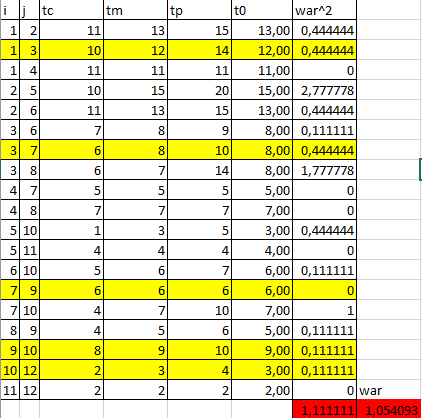

Dzięki temu możliwe było policzenie terminu realizacji z prawdopodobieństwem 0.9:

Z tablic wartość rozkładu dla P(td <= tr) = 0.9 to około X = 1,28

# Wykres Gantt'a
Do sporządzenia wykresu została użyta biblioteka matplotlib oraz narzędzie w postaci funkcji stworzeonej przez Copyright (c) 2018 Vamsi Aribandi

{(1, 2): 0, (1, 3): 0, (1, 4): 0, (2, 5): 13, (2, 6): 13, (3, 6): 12, (3, 7): 12, (3, 8): 12, (4, 7): 11, (4, 8): 11, (5, 10): 28, (5, 11): 28, (6, 10): 26, (7, 9): 20, (7, 10): 20, (8, 9): 19, (10, 12): 35, (11, 12): 32, (9, 10): 26}
{(1, 2): 3, (1, 3): 0, (1, 4): 3, (2, 5): 17, (2, 6): 16, (3, 6): 21, (3, 7): 12, (3, 8): 14, (4, 7): 15, (4, 8): 14, (5, 10): 32, (5, 11): 32, (6, 10): 29, (7, 9): 20, (7, 10): 28, (8, 9): 21, (10, 12): 35, (11, 12): 36, (9, 10): 26}
{(1, 2): 16, (1, 3): 12, (1, 4): 14, (2, 5): 32, (2, 6): 29, (3, 6): 29, (3, 7): 20, (3, 8): 21, (4, 7): 20, (4, 8): 21, (5, 10): 35, (5, 11): 36, (6, 10): 35, (7, 9): 26, (7, 10): 35, (8, 9): 26, (10, 12): 38, (11, 12): 38, (9, 10): 35}
{(1, 2): 13, (1, 3): 12, (1, 4): 11, (2, 5): 28, (2, 6): 26, (3, 6): 20, (3, 7): 20, (3, 8): 19, (4, 7): 16, (4, 8): 18, (5, 10): 31, (5, 11): 32, (6, 10): 32, (7, 9): 26, (7, 10): 27, (8, 9): 24, (10, 12): 38, (11, 12): 34, (9, 10): 35}
{(1, 2): 3, (1, 3): 0, (1, 4): 3, (2, 5): 4, (2, 6): 3

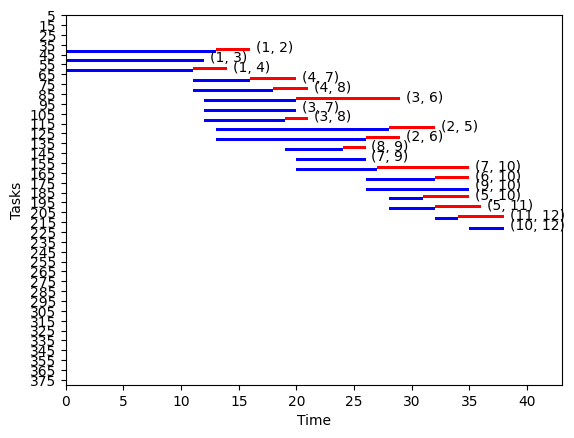

In [8]:
import matplotlib.pyplot as plt
def make_gantt_chart(graph, startTimes, completionTimes, durations, slackTimes):
    
    fig, ax = plt.subplots()
    y_values = sorted(startTimes.keys(), key = lambda x: startTimes[x])
    y_start = 40
    y_height = 5
    for value in y_values:
        ax.broken_barh([(startTimes[value], durations[value])], (y_start, y_height-2), facecolors = 'blue')
        ax.broken_barh([(completionTimes[value], slackTimes[value])], (y_start-2, y_height-2), facecolors = 'red')
        ax.text(completionTimes[value] + slackTimes[value] + 0.5,y_start + y_height/2, value)
        y_start += 10
    ax.set_xlim(0, max(completionTimes.values()) + 5)
    ax.set_ylim(len(durations)*20)
    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    i = 5
    y_ticks = []
    y_ticklabels = []
    while i < len(durations)*20:    
        y_ticks.append(i)
        i += 10
    ax.set_yticks(y_ticks)
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off
    plt.savefig('gantt.png', bbox_inches = 'tight')
    plt.show()
make_gantt_chart(graph, Pw, Kw, duration, Zc)

# Zadanie 2


# Zadanie 3